# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [6]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [7]:
len(reviews)

25000

In [8]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [9]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [10]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [11]:
from collections import Counter
import numpy as np

In [12]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [33]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [34]:
positive_counts.most_common()

[('', 1100936),
 ('the', 346648),
 ('.', 319308),
 ('and', 179444),
 ('a', 167376),
 ('of', 153710),
 ('to', 133492),
 ('is', 114490),
 ('in', 100430),
 ('br', 98470),
 ('it', 96050),
 ('i', 81486),
 ('that', 71260),
 ('this', 70160),
 ('s', 67630),
 ('as', 52616),
 ('with', 46494),
 ('for', 44832),
 ('was', 43834),
 ('film', 41874),
 ('but', 41644),
 ('movie', 38148),
 ('his', 34454),
 ('on', 34016),
 ('you', 33362),
 ('he', 32564),
 ('are', 29614),
 ('not', 28544),
 ('t', 27440),
 ('one', 27310),
 ('have', 25174),
 ('be', 24832),
 ('by', 23994),
 ('all', 23884),
 ('who', 22928),
 ('an', 22588),
 ('at', 22468),
 ('from', 21534),
 ('her', 20948),
 ('they', 19790),
 ('has', 18372),
 ('so', 18308),
 ('like', 18076),
 ('about', 16626),
 ('very', 16610),
 ('out', 16268),
 ('there', 16114),
 ('she', 15558),
 ('what', 15474),
 ('or', 15464),
 ('good', 15440),
 ('more', 15042),
 ('when', 14912),
 ('some', 14882),
 ('if', 14570),
 ('just', 14304),
 ('can', 14002),
 ('story', 13560),
 ('time', 

In [32]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [16]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [17]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.1326133844207011),
 ('wasting', -2.1178155545614512),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.9216610938019989),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),

# Transforming Text into Numbers

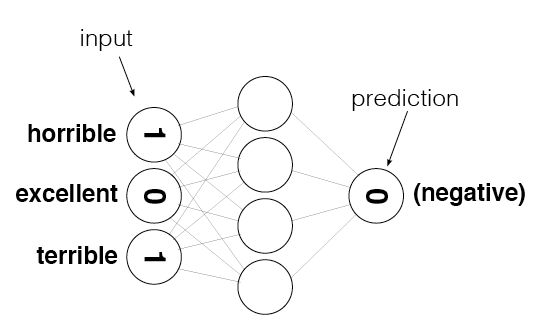

In [18]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

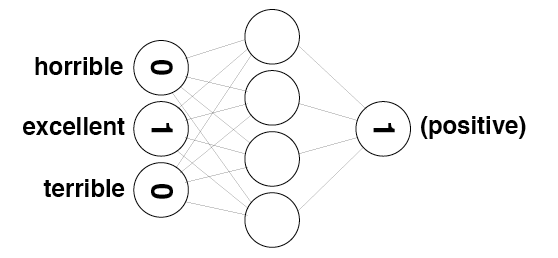

In [19]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [20]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [21]:
list(vocab)

['',
 'unmerciful',
 'redundancy',
 'flophouse',
 'tumor',
 'gloatingly',
 'blander',
 'repast',
 'unredeeming',
 'alexej',
 'houseboat',
 'requirements',
 'raid',
 'upends',
 'signifying',
 'louvre',
 'curious',
 'telecommunicational',
 'hewlitt',
 'neorealism',
 'argumentative',
 'shredder',
 'discriminates',
 'encino',
 'thnik',
 'animator',
 'ffa',
 'rents',
 'clasping',
 'diviner',
 'lusterio',
 'utensils',
 'alden',
 'cassell',
 'freindship',
 'yellin',
 'industrialize',
 'babyy',
 'traffic',
 'thomerson',
 'bulb',
 'sisyphus',
 'woodsmen',
 'unselfishness',
 'harms',
 'trended',
 'adjustin',
 'cahulawassee',
 'vp',
 'stood',
 'cock',
 'unfathomably',
 'captor',
 'helfgott',
 'catalina',
 'sahan',
 'flick',
 'dkman',
 'phenomonauts',
 'sdp',
 'kastle',
 'sharron',
 'emerson',
 'stop',
 'evaluation',
 'patrica',
 'yellowing',
 'bertram',
 'hoyt',
 'echos',
 'bless',
 'objects',
 'cineastic',
 'parrot',
 'fatih',
 'skeets',
 'romanian',
 'shrines',
 'naturalistic',
 'marketability'

In [22]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

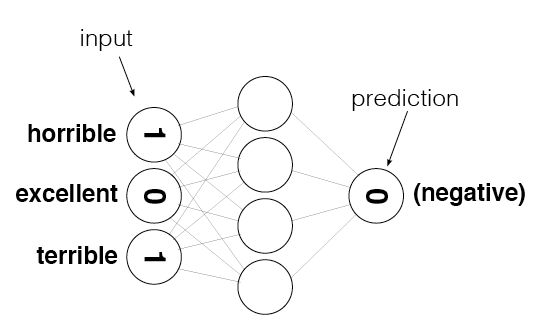

In [23]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [24]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'unmerciful': 1,
 'redundancy': 2,
 'flophouse': 3,
 'tumor': 4,
 'gloatingly': 5,
 'blander': 6,
 'repast': 7,
 'unredeeming': 8,
 'alexej': 9,
 'houseboat': 10,
 'requirements': 11,
 'raid': 12,
 'upends': 13,
 'signifying': 14,
 'louvre': 15,
 'curious': 16,
 'telecommunicational': 17,
 'hewlitt': 18,
 'neorealism': 19,
 'argumentative': 20,
 'shredder': 21,
 'discriminates': 22,
 'encino': 23,
 'thnik': 24,
 'animator': 25,
 'ffa': 26,
 'rents': 27,
 'clasping': 28,
 'diviner': 29,
 'lusterio': 30,
 'utensils': 31,
 'alden': 32,
 'cassell': 33,
 'freindship': 34,
 'yellin': 35,
 'industrialize': 36,
 'babyy': 37,
 'traffic': 38,
 'thomerson': 39,
 'bulb': 40,
 'sisyphus': 41,
 'woodsmen': 42,
 'unselfishness': 43,
 'harms': 44,
 'trended': 45,
 'adjustin': 46,
 'cahulawassee': 47,
 'vp': 48,
 'stood': 49,
 'cock': 50,
 'unfathomably': 51,
 'captor': 52,
 'helfgott': 53,
 'catalina': 54,
 'sahan': 55,
 'flick': 56,
 'dkman': 57,
 'phenomonauts': 58,
 'sdp': 59,
 'kastle': 6

In [25]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [26]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [27]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [28]:
labels[0]

'POSITIVE'

In [29]:
get_target_for_label(labels[0])

1

In [30]:
labels[1]

'NEGATIVE'

In [31]:
get_target_for_label(labels[1])

0